# グラフ描画ライブラリ matplotlib（入門編）

---

- ref: https://matplotlib.org/
- blog: https://slash-z.com/
- github: https://github.com/KazutoMakino/PythonCourses

---

説明資料ですとかデータ分析における図の作成について，皆さんはどんなツールを用いていますでしょうか？  
オフィス用途だと Microsoft の Excel を用いることが圧倒的に多いかと思われます．  
データ数が多いと Excel では少々役不足となり，グラフ描画ソフトを検討することになりますが，フリーだと例えば Graph-R とかあったり，費用がかかるもので個人的に使ったことあるのは，Igor Pro とか Tecplot 360 とか色々ありますね．  
Python においては，グラフ描画や画像を加工／表示したりできるライブラリが数多く存在します．  
その中でも代表的なのが matplotlib というライブラリで，比較的少ないコード数にてグラフ描画が可能です．  
今回は，網羅的な説明や仕組みについては公式ドキュメントを参照いただくとして，ざっと色々なグラフを眺めた後，よく用いるグラフの設定方法について紹介していきます．  
当該記事の動作環境は，notebook 上にグラフ描画させるため jupyter （VSCode 上でも可）を想定しています．

---

## matplotlib 概要

matplotlib（マットプロットリブ）は，プログラミング言語の MATLAB のように比較的簡単なコードでグラフを描画できるライブラリです．  
ある程度描けるようになったあとで，「どんなことできるか」，「あれってどう書いたっけ」というときには，公式のチートシート (https://matplotlib.org/cheatsheets/) を見ると良いでしょう．  
「比較的簡単なコード」という表現をしているのは，深くまで理解して使おうとすると，グラフ内の軸／プロット／背景などは全て Artist と呼ばれる要素になっていますが，これらを正確に厳密に操作したくなってくると，公式ドキュメント (https://matplotlib.org/stable/tutorials/intermediate/artists.html) を紐解く必要があるからです．  
しかしながら，当該記事では，この Artist について掘り下げません．  
もし，気になる場合は，こちらの記事 (https://qiita.com/skotaro/items/08dc0b8c5704c94eafb9) を参照いただくと良いかと思われます（個人的に非常に勉強になりました）．  
公式ドキュメント (https://matplotlib.org/stable/plot_types/index.html) を参考にすると，扱えるプロットの種類としてはいっぱいあって，ざっと以下です．

ベーシックなグラフ：

| コード | 図の種類 |
| - | - |
| plot(x, y) | 折れ線グラフ |
| scatter(x, y) | 散布図 |
| bar(x, height), barh(y, width) | 縦／横棒グラフ |
| stem(x, y) | 幹葉図 |
| step(x, y) | 階段グラフ |
| fill_between(x, y1, y2) | 2 つの折れ線グラフの間を塗りつぶした図 |

画像／行列／場の図：

| コード | 図の種類 |
| - | - |
| imshow(Z) | 画像データ表示 |
| pcolormesh(X, Y, Z) | 疑似カラーマップ |
| contour(X, Y, Z) | 等高線図 |
| contourf(X, Y, Z) | 等高線間を塗りつぶした図 |
| barbs(X, Y, U, V) | 矢羽図 |
| quiver(X, Y, U, V) | ベクトル図 |
| streamplot(X, Y, U, V) | 流線図 |

統計データ用の図：

| コード | 図の種類 |
| - | - |
| hist(x) | ヒストグラム |
| boxplot(X) | 箱ひげ図 |
| errorbar(x, y, yerr, xerr) | エラーバー |
| violinplot(D) | バイオリングラフ |
| eventplot(D) | イベントプロット |
| hist2d(x, y) | 2 次元のヒストグラム |
| hexbin(x, y, C) | 2 次元のヒストグラムを六角形表示 |
| pie(x) | 円グラフ |

非構造化データの図：

| コード | 図の種類 |
| - | - |
| tricontour(x, y, z) | 非構造化データの等高線図（離散点用の contour） |
| tricontourf(x, y, z) | 非構造化データの等高線間塗りつぶした図（離散点用の contourf） |
| tripcolor(x, y, z) | 非構造化データの疑似カラーマップ（離散点用の pcolormesh） |
| triplot(x, y) | 非構造化データの折れ線グラフ（全要素点が線分で結ばれる） |

言葉で書いてみましたが，意味のわからないものもあると思うので，順番にコードとともに見ていきましょう．

---

## まずは import

matplotlib について基本的には，matplotlib.pyplot をよく用い，公式サイト (https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) ではこれを plt と略して使っていて，一般的なのでこちらを使っていきます．  

In [1]:
import matplotlib.pyplot as plt

まだ何一つプロットしてないところで補足ですが，書籍や web サイトで，「`%matplotlib inline` をまず書け」みたいな記述があったりしますが，いつからか matplotlib の backend にデフォルトで追加されたため不要になったため，当該記事ではこの記述はしません．  
確認したい場合は，matplotlib.get_backend() にて確認できます．

In [2]:
import matplotlib as mpl

mpl.get_backend()

'module://matplotlib_inline.backend_inline'

---

## 可視化するデータセットの読み込み

以降の可視化には，機械学習ライブラリの scikit-learn に収録されているものを用います．  
機械学習用のライブラリですので，scikit-learn にて提供されるデータセットは，基本的には説明変数から目的変数を予測するようなデータセットです．  
matplotlib では，構造化データ，画像データ，流れなどの場の力，非構造化データがプロットできるので，それぞれ以下のデータセットを用います．

- 構造化データ・・・・カルフォルニア大学アーバイン校（UCI）が提供している，ワイン認識データセット (API: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset)
- 画像データ・・・・カルフォルニア大学アーバイン校（UCI）が提供している，手書き数字の認識データセット (API: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
- 場の力，非構造化データ・・・・その都度定義

In [3]:
from sklearn.datasets import load_wine, load_digits

wine_x, wine_y = load_wine(return_X_y=True, as_frame=True)
digi_x, digi_y = load_digits(return_X_y=True, as_frame=False)
digi_x = digi_x.reshape((-1, 8, 8))

In [4]:
wine_x.shape, wine_y.shape, digi_x.shape, digi_y.shape

((178, 13), (178,), (1797, 8, 8), (1797,))

ワインデータセットは，イタリアの同じ地域で栽培されたワインについて，13 個の成分について化学分析された結果からワインの等級を予測するデータセットです．  
成分の含有量を表す説明変数の方は，

- alcohol: アルコール度数
- malic_acid: りんご酸
- ash: 無機成分
- alcalinity_of_ash: 無機成分におけるアルカリ度
- magnesium: マグネシウム
- total_phenols: フェノールの総含有量
- flavanoids: フラボノイド（有機化合物群の一種）
- nonflavanoid_phenols: ノンフラボノイドフェノール
- proanthocyanins: プロアントシアニン（ポリフェノールの一種）
- color_intensity: 色の濃さ
- hue: 色相
- od280/od315_of_diluted_wines: クロマトグラフィーによるワイン溶液の 280 [nm] と 315 [nm] の吸光度の比
- proline: プロリン（アミノ酸の一種）

目的変数 df_y は，カラム名 target となっていますが，これはワインの等級を表すそうです．

一方，手書き数字の認識データセット mnist （エムニスト）については，8 x 8 [px] のグレイスケール画像です．

これらのデータセットについて，色々可視化をしてみましょう．  
その前に，毎回プロットオブジェクトに渡す配列データを，例えば `wine_x["alcohol"]` と書いていくのは面倒なので，違う文字式においておきます．

In [5]:
idxs = wine_x.index.to_numpy()
alcohol = wine_x["alcohol"].to_numpy()

---

## matplotlib のプロット色々

### plot(x, y)：　折れ線グラフ

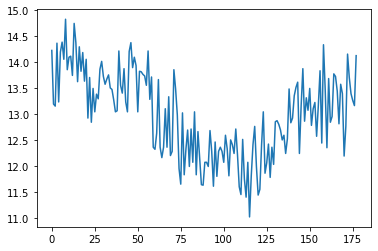

In [6]:
plt.plot(alcohol)
plt.show()

単にプロットするだけなら，折れ線グラフなら，たった上記の 2 行で済みます．  
簡単で楽ですね．  
ちなみに，plt.show() がなくとも jupyter ではコードブロックが終わっていればグラフ描画されるのですが，plt.plot の戻り値の出力が文字列で出力されるのも気持ちが悪いので，plt.show() を記載しています．

plt.plot は第一引数を省略することができ，この場合，自動で 0 始まりの要素番号になります．

### scatter(x, y)： 散布図

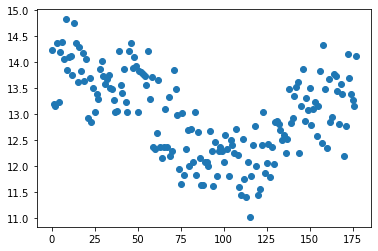

In [7]:
plt.scatter(idxs, alcohol)
plt.show()

### bar(x, height)：barh(y, width) | 縦／横棒グラフ

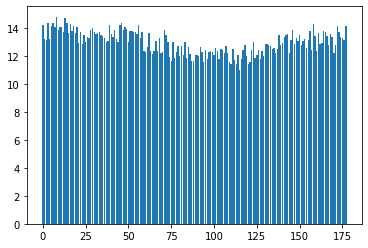

In [8]:
plt.bar(idxs, alcohol)
plt.show()

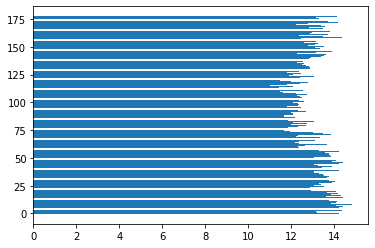

In [9]:
plt.barh(idxs, alcohol)
plt.show()

### stem(x, y)： 幹葉図

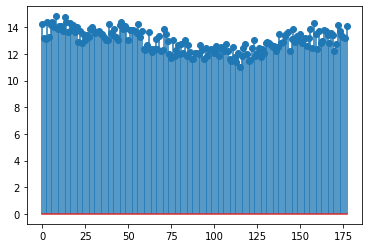

In [10]:
plt.stem(idxs, alcohol)
plt.show()

### step(x, y)： 階段グラフ

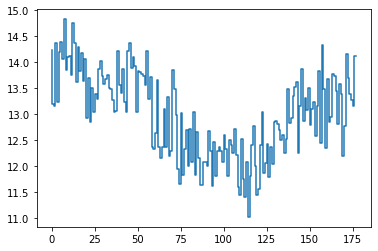

In [11]:
plt.step(idxs, alcohol)
plt.show()

### fill_between(x, y1, y2)： 2 つの折れ線グラフの間を塗りつぶした図

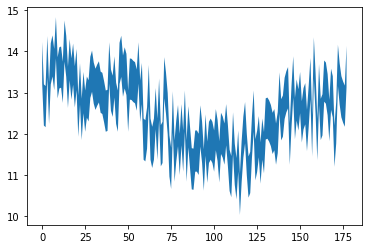

In [12]:
plt.fill_between(x=idxs, y1=alcohol, y2=alcohol-1)
plt.show()

### imshow(Z)： 画像データ表示

imshow については，Z は画像のようなデータである必要があり，画像のオブジェクト，あるいは，2D 以上の配列である必要があります．

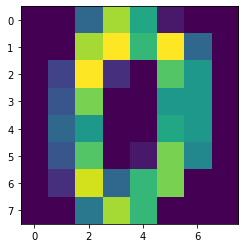

In [13]:
plt.imshow(digi_x[0])
plt.show()

データとしてはグレイスケール画像なので，グレイスケールに対応させましょう．  
引数 cmap に "gray" とするだけで対応が可能です．  
cmap はカラーマップを表しており，公式ドキュメント (https://matplotlib.org/stable/gallery/color/colormap_reference.html) に一覧が記載されています（今回はやりませんが，matplotlib をバックエンドとする seaborn というライブラリも同じ cmap を使用できます）．  
カラーマップと色の対応がわかるカラーバーは，colorbar を記載することで表示が可能です．

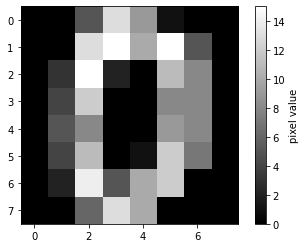

In [14]:
plt.imshow(digi_x[0], cmap="gray")
plt.colorbar(label="pixel value")
plt.show()

### pcolormesh(X, Y, Z)： 疑似カラーマップ

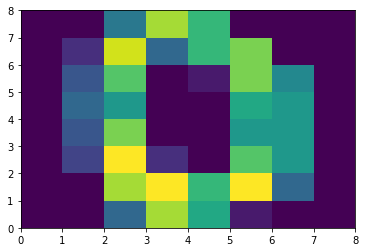

In [15]:
plt.pcolormesh(digi_x[0])
plt.show()

### contour(X, Y, Z)： 等高線図

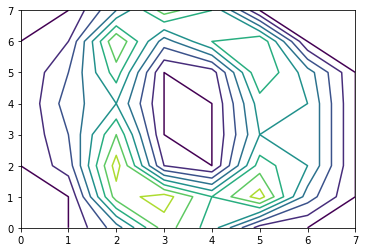

In [16]:
plt.contour(digi_x[0])
plt.show()

### contourf(X, Y, Z)： 等高線間を塗りつぶした図

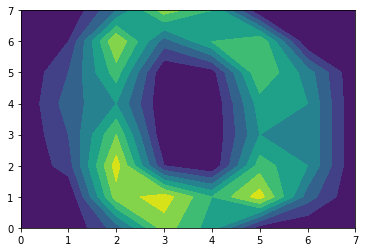

In [17]:
plt.contourf(digi_x[0])
plt.show()

### barbs(X, Y, U, V)： 矢羽図

barbs / quiver / streamplot は流れの 2 次元断面を可視化するようなグラフであり，x / y 座標のそれぞれのメッシュ点に対し，u / v 成分があるように引数を 4 つ与える必要があります．  
データセットが仰々しくなるのもどうかと思うので，ここでは，簡易的に以下で生成します．

In [18]:
import numpy as np

In [19]:
flow_x, flow_y = np.meshgrid(np.arange(0, 5, 1), np.arange(0, 5, 1))
rng = np.random.RandomState(seed=0)
flow_u = rng.random(5*5).reshape((5, 5)) * 10
flow_v = rng.random(5*5).reshape((5, 5)) * 10

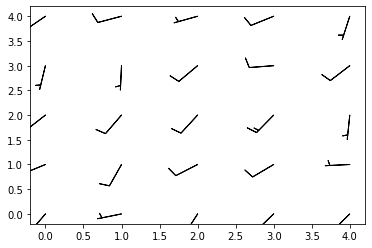

In [20]:
plt.barbs(flow_x, flow_y, flow_u, flow_v)
plt.show()

### quiver(X, Y, U, V)： ベクトル図

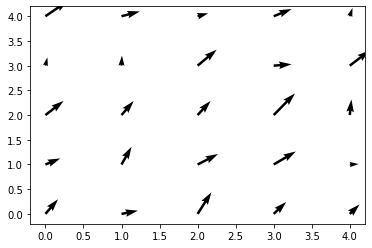

In [21]:
plt.quiver(flow_x, flow_y, flow_u, flow_v)
plt.show()

### streamplot(X, Y, U, V)： 流線図

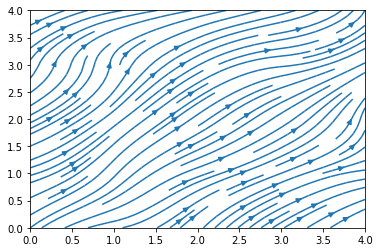

In [22]:
plt.streamplot(flow_x, flow_y, flow_u, flow_v)
plt.show()

### hist(x)： ヒストグラム

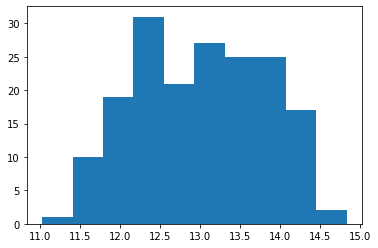

In [23]:
plt.hist(alcohol)
plt.show()

### boxplot(X)： 箱ひげ図

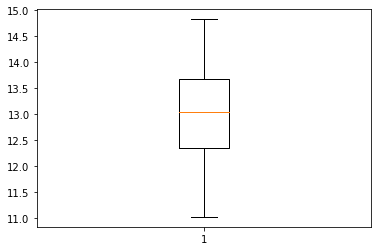

In [24]:
plt.boxplot(alcohol)
plt.show()

### errorbar(x, y, yerr, xerr)： エラーバー

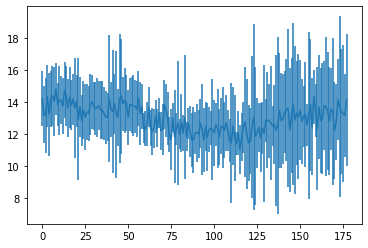

In [25]:
plt.errorbar(x=idxs, y=alcohol, yerr=wine_x["malic_acid"])
plt.show()

### violinplot(D)： バイオリングラフ

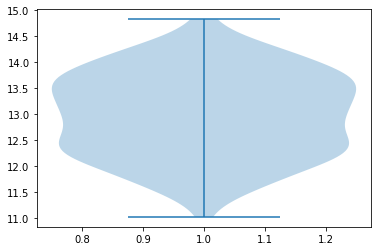

In [26]:
plt.violinplot(alcohol)
plt.show()

### eventplot(D)： イベントプロット

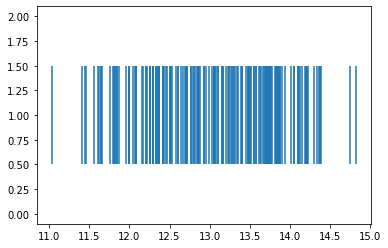

In [27]:
plt.eventplot(alcohol)
plt.show()

### hist2d(x, y)： 2 次元のヒストグラム

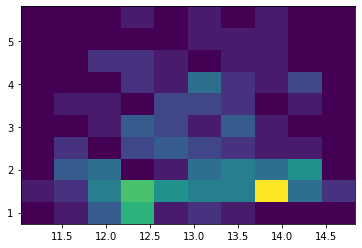

In [28]:
plt.hist2d(x=alcohol, y=wine_x["malic_acid"])
plt.show()

### hexbin(x, y, C)： 2 次元のヒストグラムを六角形表示

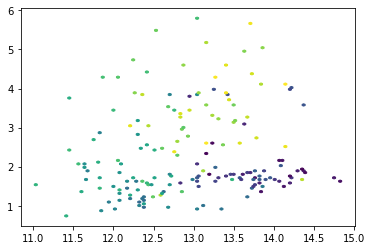

In [29]:
plt.hexbin(x=alcohol, y=wine_x["malic_acid"], C=idxs)
plt.show()

### pie(x)： 円グラフ

円グラフの例には，ワインの等級に対する数の割合について可視化してみます．  
等級それぞれの数は，wine_y に対して .value_counts() を作用させて取得します．

In [30]:
wine_y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

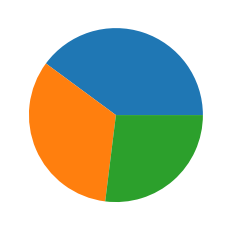

In [31]:
plt.pie(wine_y.value_counts())
plt.show()

### tricontour(x, y, z)： 非構造化データの等高線図（離散点用の contour）

非構造化データは，簡易的に次で定義します．

In [32]:
rng = np.random.RandomState(seed=0)
data_x = rng.random(10)
data_y = rng.random(10)
data_z = rng.random(10)

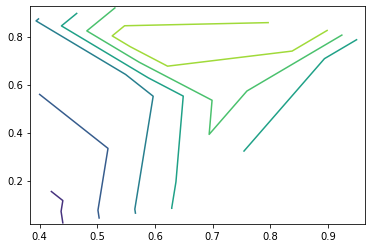

In [33]:
plt.tricontour(data_x, data_y, data_z)
plt.show()

### tricontourf(x, y, z)： 非構造化データの等高線間塗りつぶした図（離散点用の contourf）

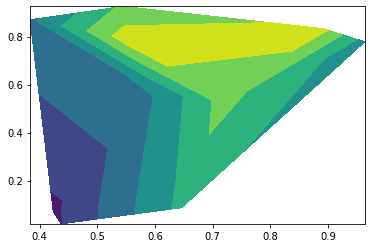

In [34]:
plt.tricontourf(data_x, data_y, data_z)
plt.show()

### tripcolor(x, y, z)： 非構造化データの疑似カラーマップ（離散点用の pcolormesh）

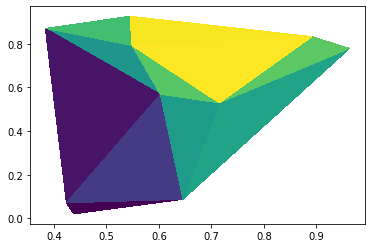

In [35]:
plt.tripcolor(data_x, data_y, data_z)
plt.show()

### triplot(x, y)： 非構造化データの折れ線グラフ（全要素点が線分で結ばれる）

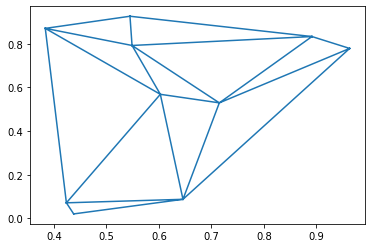

In [36]:
plt.triplot(data_x, data_y)
plt.show()

---

## グラフの画像の保存方法

上記で生成したグラフは plt.savefig で全て画像として保存することができます．

```
matplotlib.pyplot.savefig(fname, *, dpi='figure', format=None, metadata=None, bbox_inches=None, pad_inches=0.1, facecolor='auto', edgecolor='auto', **kwargs)

- fname・・・・保存するファイルパスです．
- dpi='figure'・・・・Dot per inch で float で指定．初期値は "figure" となっており，作成した図の dpi そのままの値が用いられます．
- format=None・・・・保存する画像の拡張子．fname にてパスで指定している場合は不要です．
- metadata=None・・・・画像ファイルのメタデータです．
- bbox_inches=None・・・・bbox は bounding box を意味し，図のどの部分を区切って保存するかを指定します．初期値 None では余白や配置が plt.show() にて描画されたそのままが保存される．"tight" とすると，余計な余白がトリミングされて保存されます．具体的な数値としては matplotlib.transforms.BboxBase オブジェクトにて指定できるが，基本的には指定しないか "tight" とすることがほとんどです．
- pad_inches=0.1・・・・bbox_inches="tight" のときに，プロットエリアの周りの余白を inch にて指定します．
- facecolor='auto'・・・・グラフの画像の背景色を指定できます．"auto" の場合は現在の fig の facecolor と同じになります．
- edgecolor='auto'・・・・グラフの画像の外縁の色を指定できます．"auto" の場合は現在の fig の edgecolor と同じになります．
```

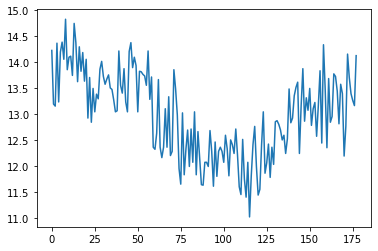

In [37]:
plt.plot(alcohol)
plt.savefig(fname="test.png")

これで画像が保存できました．  
今回は .png で保存しましたが，画像を開いてみると，軸ラベルの部分が透過されています．  
この設定については，plot する前に plt.figure(facecolor="white") として図の背景色を任意の色で指定することにより，軸ラベルの透過させないこともできます．  
もちろん，.jpg にて保存する場合は，この透過については関係ありません．  
.ipynb では上記の例でグラフが同時に出力されますが，保存のみで出力させたくない場合は，plt.savefig の次に plt.close を付け足します．

In [38]:
plt.figure(facecolor="white")
plt.plot(alcohol)
plt.savefig(fname="test.png")
plt.close()

In [39]:
plt.plot(alcohol)
plt.savefig(fname="test.jpg", bbox_inches="tight")
plt.close()

---

## matplotlib の書き方について

グラフの書き方は大きく分けて以下 2 種類あります (https://matplotlib.org/stable/tutorials/introductory/lifecycle.html)．

- pyplot を用いる書き方・・・・上のグラフの例で用いていた MATLAB の plot に似た簡易的な書き方
- オブジェクト指向な書き方・・・・matplotlib.figure.Figure 属性と matplotlib.axes 属性にインスタンス化し，グラフや軸などを設定していく

前者の方が書く行数が少なくて済むのですが，複数のグラフを書いたり細かい設定を行いたい場合は後者の方が用いやすいです．  
また，公式にもオブジェクト指向の書き方を推奨されていますので，以下では，オブジェクト指向にてグラフを書いていきます．  
どう書けばよいかというと，

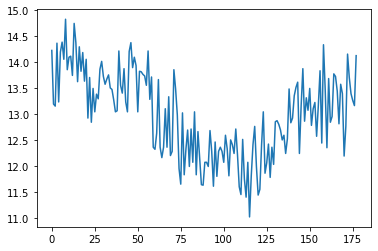

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(alcohol)
plt.show()

という感じで，最初に fig を plt.figure によって生成してから，ax を fig の add_subplot メソッドで生成し，グラフプロットはこの ax に対して行います．  
ここで，add_subplot については，何やら 1,1,1 となっていて良く分からない書き方に見えますが，どういうことかというと，

```
matplotlib.pyplot.add_subplot(nrows, ncols, index, **kwargs)
- nrows: 描画したいグラフの総行数
- ncols: 描画したいグラフの総列数
- index: 今回描画したいグラフは 1 始まりで左上から何個目か
```

という引数になっており，かつ，nrows / ncols / index は位置引数で名称を指定するとエラーになるので，こういった書き方になっています．

---

## 単一の図中に複数のグラフを描画する方法

ということで，add_subplot を用いる場合における単一の図に複数グラフを描画したいときは，次のようにします．

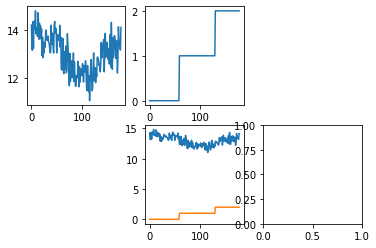

In [41]:
fig = plt.figure()
ax0 = fig.add_subplot(2, 3, 1)
ax1 = fig.add_subplot(2, 3, 2)
ax2 = fig.add_subplot(2, 3, 5)
_ = fig.add_subplot(2, 3, 6)

ax0.plot(alcohol)
ax1.plot(wine_y)
ax2.plot(alcohol)
ax2.plot(wine_y)
plt.show()

上記のような感じです．  
上の例では，ax2 とした 5 つめのグラフについて，2 種類のプロットを同一のグラフに描画していますが，コードからも分かる通り，ax2 について plot を複数回作用させることで簡単に描画が可能です．

add_subplot でも複数のグラフを描画することは可能なのですが，それぞれのグラフサイズが格子状で固定されるので，例えば，「このグラフは 3 列分描画する」ということができません．  
これを解決するのが subplot2grid を用いた書き方です．

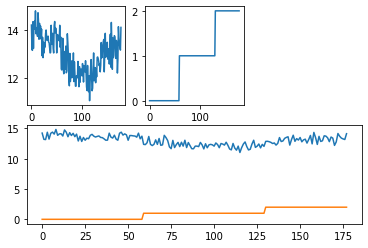

In [42]:
fig = plt.figure()
ax0 = plt.subplot2grid(shape=(2, 3), loc=(0, 0), rowspan=1, colspan=1)
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 1), rowspan=1, colspan=1)
ax2 = plt.subplot2grid(shape=(2, 3), loc=(1, 0), rowspan=1, colspan=3)

ax0.plot(alcohol)
ax1.plot(wine_y)
ax2.plot(alcohol)
ax2.plot(wine_y)
plt.show()

ax2 で定義したグラフが，行サイズ 1，列サイズ 3 で描画できています．  
subplot2grid の引数は以下を考慮して指定します．

```
matplotlib.pyplot.subplot2grid(shape, loc, rowspan=1, colspan=1, fig=None, **kwargs)
- shape: (int, int) ・・・・図中の行・列方向のグラフの数で (行サイズ, 列サイズ) のように指定
- loc: (int, int) ・・・・axes オブジェクトを 0 始まりで (何行目, 何列目) に配置させたいか
- rowspan: int, default: 1 ・・・・今作る axes オブジェクトの行方向のグラフサイズ
- colspan: int, default: 1 ・・・・今作る axes オブジェクトの列方向のグラフサイズ
- fig: Figure, optional ・・・・どの fig に描画したいか（初期値は現在の fig なので書くことは少ない）
```

また，グラフの中にグラフを描画することも可能です．

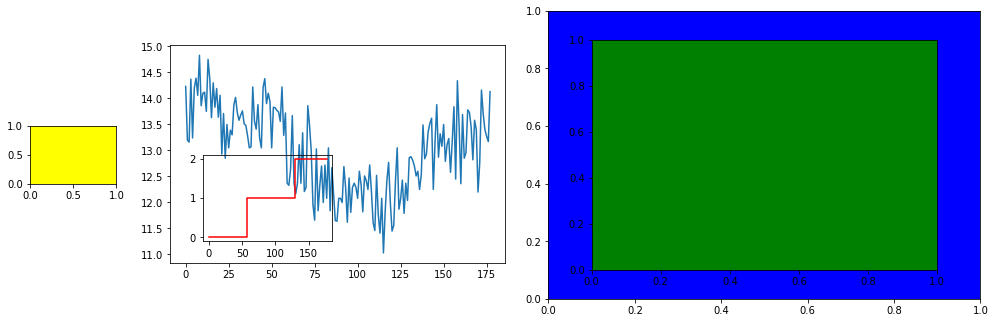

In [43]:
fig = plt.figure()
ax0 = fig.add_subplot(1,1,1)
ax1 = plt.axes((0.2, 0.2, 0.3, 0.3), facecolor="none")
ax2 = plt.axes((1, 0, 1, 1), facecolor="blue")
ax3 = plt.axes((1.1, 0.1, 0.8, 0.8), facecolor="green")
ax4 = plt.axes((-0.2, 0.4, 0.2, 0.2), facecolor="yellow")

ax0.plot(alcohol)
ax1.step(wine_y.index, wine_y, color="red")

plt.show()

という風に plt.axes を用いることで，図の左下を原点として任意位置にグラフを配置することができます．  
どこに配置するかは plt.axes の 1 つ目の引数にタプルで (グラフの左端, 底辺, 横幅, 高さ) のように指定します．  
ただし，今回のような plt.axes で横や高さ方向に 0 から 1 の範囲外のグラフを複数作成したときに fig.tight_layout() を行うと，グラフが被ったりなどするので，この場合は tight_layout を用いることはおすすめできません．  
plt.axes と fig.add_subplot の型は次の通り同一です．

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
print(type(plt.axes()) == type(ax))
print(type(ax))
plt.close()

True
<class 'matplotlib.axes._subplots.AxesSubplot'>


グラフ 1 枚のみ描画するときは，fig.add_subplot でなく plt.axes としても問題なく描画できます．

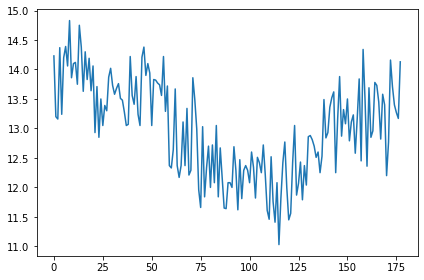

In [45]:
fig = plt.figure()
ax = plt.axes()
ax.plot(alcohol)
fig.tight_layout()
plt.show()

色々なグラフ作成手法がありますが，個人的な使い分けとしては，

- plt.axes・・・・単一グラフの場合（字数が少ない，かつ，fig.add_subplot などはエディタにてシンタックスハイライトや予測変換が利かないが，plt.axes は利くため）
- fig.add_subplot・・・・複数グラフで，それぞれのグラフの大きさが同じ場合
- fig.subplot2grid・・・・複数グラフで，それぞれのグラフの大きさが異なる場合

といった感じが良いと思います．

---

## 第 2 縦軸／第 2 横軸について

第 2 縦軸／第 2 横軸は，axes オブジェクトに対して twinx, twiny を用いることで，生成することができます．  
以下のような書き方になります．

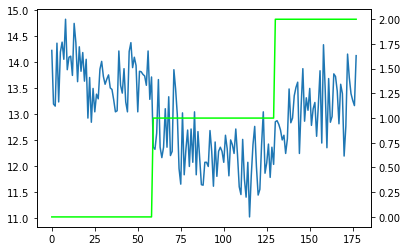

In [46]:
fig = plt.figure()
ax0 = plt.axes()
ax0.plot(alcohol)

ax1 = ax0.twinx()
ax1.plot(wine_y, color="lime")
plt.show()

ここで，プロットが同じ色だと良く分からないので，ax1.plot の引数に color="lime" としています．  
指定できる色 (color の引数) は決まっていて，公式ドキュメント (https://matplotlib.org/stable/gallery/color/named_colors.html) に見本とともにまとめられています．

---

## 軸などの設定について

今までのグラフだと，例えば軸のタイトルが無かったり，複数描画した時にグラフエリアが小さかったり，軸ラベルが他のグラフと被っていたりしていたので，説明資料に用いるには綺麗にしたいと思われるでしょう．  
ということで，グラフや軸の設定について，以下で紹介していきます．  
しかしながら，全てを説明すると膨大な量で大変なので，個人的に良く使うのものについて記載していきます．  
以下の例は色々詰め込んでみました．

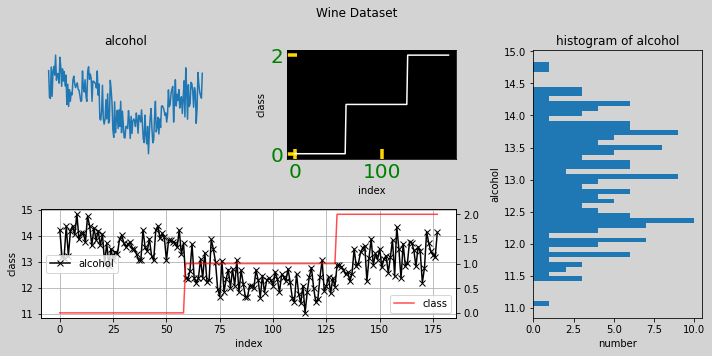

In [47]:
fig = plt.figure(figsize=(10, 5), facecolor="lightgray")
ax0 = plt.subplot2grid(shape=(2, 3), loc=(0, 0), rowspan=1, colspan=1)
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 1), rowspan=1, colspan=1, facecolor="black")
ax2l = plt.subplot2grid(shape=(2, 3), loc=(1, 0), rowspan=1, colspan=2)
ax3 = plt.subplot2grid(shape=(2, 3), loc=(0, 2), rowspan=2, colspan=1, facecolor="none")

ax0.plot(alcohol)
ax0.set_title("alcohol")
ax0.axis("off")

ax1.plot(wine_y, color="white")
ax1.set_xlabel("index")
ax1.set_ylabel("class")
ax1.tick_params(direction="in", length=10.2, width=3.5, color="gold", labelsize=20, labelcolor="green")

ax2l.plot(alcohol, label="alcohol", color="black", marker="x")
ax2l.legend(loc="center left")
ax2l.set_xlabel("index")
ax2l.set_ylabel("alcohol")

ax2r = ax2l.twinx()
ax2r.plot(wine_y, label="class", color="red", alpha=0.7)
ax2r.legend(loc="lower right")
ax2l.set_ylabel("class")
ax2l.grid()

ax3.hist(alcohol, bins=50, orientation="horizontal")
ax3.set_title("histogram of alcohol")
ax3.set_xlabel("number")
ax3.set_ylabel("alcohol")


fig.suptitle("Wine Dataset")
fig.tight_layout()

fig.savefig("test.png", bbox_inches="tight")

plt.show()

順番に見ていきましょう．

```python
fig = plt.figure(figsize=(10, 5), facecolor="lightgray")
```

上記のように，plt.figure の引数として figsize があり，タプルで (横幅, 高さ) をインチで図の大きさを指定できます．  

```python
ax1 = plt.subplot2grid(shape=(2, 3), loc=(0, 1), rowspan=1, colspan=1, facecolor="black")
```

axes を生成する時に，引数 facecolor に色を指定すると，プロットエリアの背景色を変えることができます．  
"none" を指定すると，プロットエリアの背景を透明にできます．

```python
ax0.set_title("alcohol")
```

各々のグラフタイトルは，set_title で付加できます．

```python
ax0.axis("off")
```

axes.axis("off") とすると，そのグラフの全ての軸や軸目盛りや軸ラベルやプロットエリア背景をなしにできます．

```python
ax1.set_xlabel("index")
ax1.set_ylabel("class")
```

set_title と同じ要領で，set_xlabel, set_ylabel にて x / y 軸ラベルを付加することができます．

```python
ax1.tick_params(direction="in", length=10.2, width=3.5, color="gold", labelsize=20, labelcolor="green")
```

軸を細かく設定する場合には，tick_params を用います．  
今回の例では，direction="in": 軸目盛りを内側に，length=10.2, width=3.5: 軸の長さと太さの指定，color="gold": 目盛りの色，labelsize=20, labelcolor="green": 軸ラベルのサイズと色変更　をそれぞれ行っています．  
引数については多くありすぎるので，主要なもののみ使っていくうちに覚えて，その他は，都度公式ドキュメントかネット検索にてご確認いただくのが良いと思います．

```python
ax2l.plot(alcohol, label="alcohol", color="black", marker="x")
ax2l.legend(loc="center left")
```

axes.plot の引数にて，color で色を変更できたり，marker でデータ点のマーカーを指定できたりします．  
指定できるマーカーは，公式ドキュメント (https://matplotlib.org/stable/api/markers_api.html) に見本とともに一覧が掲載されています．  
また，axes.plot の引数で label というのがありますが，これは，グラフの凡例の名称指定に用いる文字列をしていでき，グラフで表示させるには axes.legend を用います．  
凡例の位置については，引数の loc を文字列で指定することにより調整でき，公式ドキュメントの一覧 (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) の中から指定できます．  
何も指定しないと loc の初期値は "best" となり，プロットとなるべくかぶらないような位置に凡例が配置されます（調子悪いと被ることもあります）．

```python
ax2r.plot(wine_y, label="class", color="red", alpha=0.7)
```

axes.plot の引数で alpha という引数がありますが，これは，プロットの透過度であり，初期値は透過なしの 1.0 で，透明は 0.0 です．

```python
ax2l.grid()
```

グラフにマス目を追加したい場合は，axes.grid を追加します．

```python
ax3.hist(alcohol, bins=50, orientation="horizontal")
```

axes.hist の引数で，bins はヒストグラムの分割数，orientation は棒グラフの向きを指定できます．

```python
fig.suptitle("Wine Dataset")
```

fig.suptitle で画像全体のタイトルを付加できます．

```python
fig.tight_layout()
```

fig.tight_layout() で，グラフ同士が被らず，かつ，不要な余白を削除した状態で図を整えることができます．

大体の設定は上記で可能ですが，細かいところは覚えられないと思うので，「あそこを少し変えれば設定できる」という認識だけ持っておいて，問題に直面した時に都度ネット検索することになると思われます．

---

## テキスト／図形の追加

グラフ中にテキストを書き込みたい場合は axes.text を用います．  
axes.text の引数について，x, y: 基準点の x, y 座標，s: テキストの文字列とします．

c:\Users\multi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\multi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\multi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\multi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 34920 (\N{CJK UNIFIED IDEOGRAPH-8868}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\multi\AppData\Local\Programs\Python\Python310\lib\site-packages

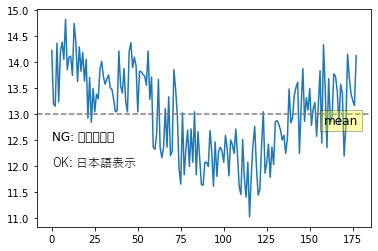

In [48]:
fig = plt.figure()
ax = plt.axes()
ax.plot(alcohol)
# axes.axhline: 水平線，axes.axvline: 垂直線を引く
ax.axhline(alcohol.mean(), color="gray", linestyle="--")
ax.text(
    x=len(alcohol), y=alcohol.mean(), s="mean",
    bbox={"facecolor": "yellow", "alpha": 0.3},
    ha="right", va="top",
    fontsize=12
)
ax.text(x=0, y=12.5, s="NG: 日本語表示", fontsize=12)
ax.text(x=0, y=12.0, s="OK: 日本語表示", fontsize=12, font="Yu Gothic")
plt.show()

日本語表示する際には，日本語を用いることができるフォントを指定しないと四角に文字化けします（通称: 豆腐）．  
上図にて，日本語表示部分についてはフォントを游ゴシックにすることで，文字化けを回避できています．  
別解として，japanize-matplotlib というライブラリをインポートしたり，seaborn というライブラリにてグラフの設定を書き換える事もできます（他にも方法はあります）．  
pip install が必要ですが，japanize-matplotlib を使う場合は，一度，当該ライブラリをインポートするだけで文字化けを回避できます．

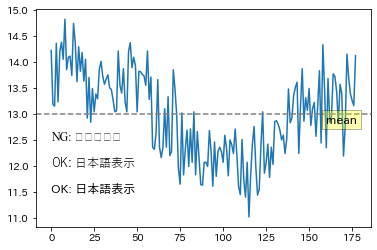

In [49]:
import japanize_matplotlib

fig = plt.figure()
ax = plt.axes()
ax.plot(alcohol)
ax.axhline(alcohol.mean(), color="gray", linestyle="--")
ax.text(
    x=len(alcohol), y=alcohol.mean(), s="mean",
    bbox={"facecolor": "yellow", "alpha": 0.3},
    ha="right", va="top",
    fontsize=12
)
ax.text(x=0, y=12.5, s="NG: 日本語表示", fontsize=12, font="Times New Roman")
ax.text(x=0, y=12.0, s="OK: 日本語表示", fontsize=12, font="Yu Gothic")
ax.text(x=0, y=11.5, s="OK: 日本語表示", fontsize=12)
plt.show()

図形を追加する場合は，pyplot でなく，matplotlib.patches を用います．

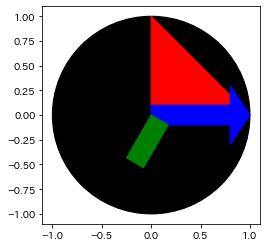

In [50]:
fig = plt.figure()
ax = plt.axes()

circle = mpl.patches.Circle(xy=(0, 0), radius=1, color="black")
poly = mpl.patches.Polygon(xy=((0,0),(0,1),(1,0)), color="red")
arrow = mpl.patches.Arrow(x=0, y=0, dx=1, dy=0, color="blue")
rect = mpl.patches.Rectangle(xy=(0,0), width=0.5, height=0.2, angle=-120, color="green")

ax.add_patch(circle)
ax.add_patch(poly)
ax.add_patch(arrow)
ax.add_patch(rect)

ax.axis("scaled")
plt.show()

上図では，円，多角形，矢印，長方形について描画してみましたが，他にもあります．  
図形を描画する場合は，matplotlib.patches.? でオブジェクトを作ってから，axes.add_patch() にて描画します．
plot などとは違い，図形描画の場合は自動で軸の範囲が調整されないので， ax.axis("scaled") のように書き加える必要があります．

---

## グラフと画像を重ねて描画

画像の表示は imshow にて可能でしたが，その前に，画像を取り込む必要があります．  
画像の取り込みは imread にて可能で，このときの画像データは次のように numpy.ndarray 形式で，今回の場合だと .png で RGBA 画像なので 4 チャンネルになっています (使用画像: https://www.irasutoya.com/2012/04/blog-post_2222.html) ．  

In [51]:
img = plt.imread(fname="./red_wine.png")
print("type: ", type(img))
print("shape: ", img.shape)

type:  <class 'numpy.ndarray'>
shape:  (744, 526, 4)


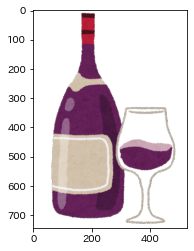

In [52]:
fig = plt.figure()
ax = plt.axes()
ax.imshow(img)
plt.show()

これに，次のようなワインのアルコールについてのヒストグラムを重ねてみましょう．

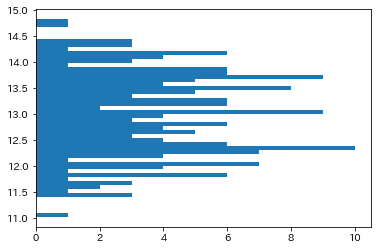

In [53]:
fig = plt.figure()
ax = plt.axes()
ax.hist(alcohol, bins=50, orientation="horizontal")
plt.show()

注意すべき点は，imshow で描画された時に y 軸は上側が原点になっていたり，画像とグラフの軸の値が異なるところです．  
何も考えずプロットすると，画像の軸に引っ張られて，グラフがあるのか無いのか全くわからなくなり，つまりこうなります．

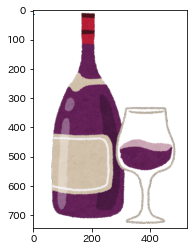

In [54]:
fig = plt.figure()
ax = plt.axes()
ax.imshow(img)
ax.hist(alcohol, bins=50, orientation="horizontal")
plt.show()

グラフの軸は変更したくないので，画像側の軸を変更します．  
グラフと同一の大きさにしたいので，グラフ描画後に axes.get_xlim, get_ylim によって，x, y 軸の最大／最小値を取得し，axes.imshow の引数の extent に (x_min, x_max, y_min, y_max) として代入します．  
以下の例では，axes.get_xlim, get_ylim によって取得した 2 つのタプル xlim, ylim を，extent=(*xlim, *ylim) としてアンパックしてそれぞれ代入しています．  
グラフと画像のアスペクト比が大きいと画像が崩れやすいので，aspect="auto" としておくと良いでしょう．

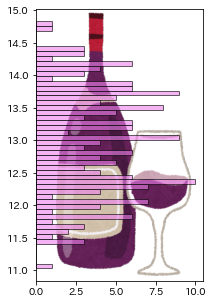

In [55]:
fig = plt.figure(figsize=(3, 5))
ax = plt.axes()

ax.hist(alcohol, bins=50, orientation="horizontal", alpha=0.6, color="violet", edgecolor="black")

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.imshow(img, extent=(*xlim, *ylim), aspect="auto")
plt.show()

---

## 演習問題

- Q1. ワインデータセットの全ての説明変数と目的変数について一望できるように，単一の画像に全部の変数のプロットを複数グラフにて出力させてください．このとき，説明変数と目的変数の違いがわかるように，目的変数のグラフだけ色を変えてください．axes の生成について，ax = [None] * len(list(wine_x.columns)) として空のリストを作成し，for 文で wine_x のカラム名で回すような書き方にすると，行数が少なく済むでしょう．次のような出力を期待します．

![./answer_01.png](./answer_01.png)

- Q2. Q1 と同様に今度は mnist データセットについて，画像を一度に 100 個表示させてみましょう．ただし，画像はグレイスケール，ラベル情報をタイトルに記載，軸なし，グラフ数は縦 5 x 横 20 とします．次のような出力を期待します．

![./answer_02.png](./answer_02.png)

- Q3. mnist データセットについて，それぞえの数字の個数を図示しましょう．次のような出力を期待します．

![./answer_03-1.png](./answer_03-1.png)

もしくは，

![./answer_03-2.png](./answer_03-2.png)

- Q4. ワインデータセットにおいて，フェノールの総含有量 (total_phenols) と色の濃さ (color_intensity) がワインの等級 (wine_y) に及ぼす影響を可視化するために，等級で色分けされたフェノール含有量と色の濃さについての散布図を描画してみましょう．次のような出力を期待します．

![./answer_04.png](./answer_04.png)